# Ejemplo de slice con diferente preprocesamiento Hounsfield

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

Shapes cargadas: noHU=(256, 512, 512), HU-600/1500=(256, 512, 512), HU-300/1400=(256, 512, 512)


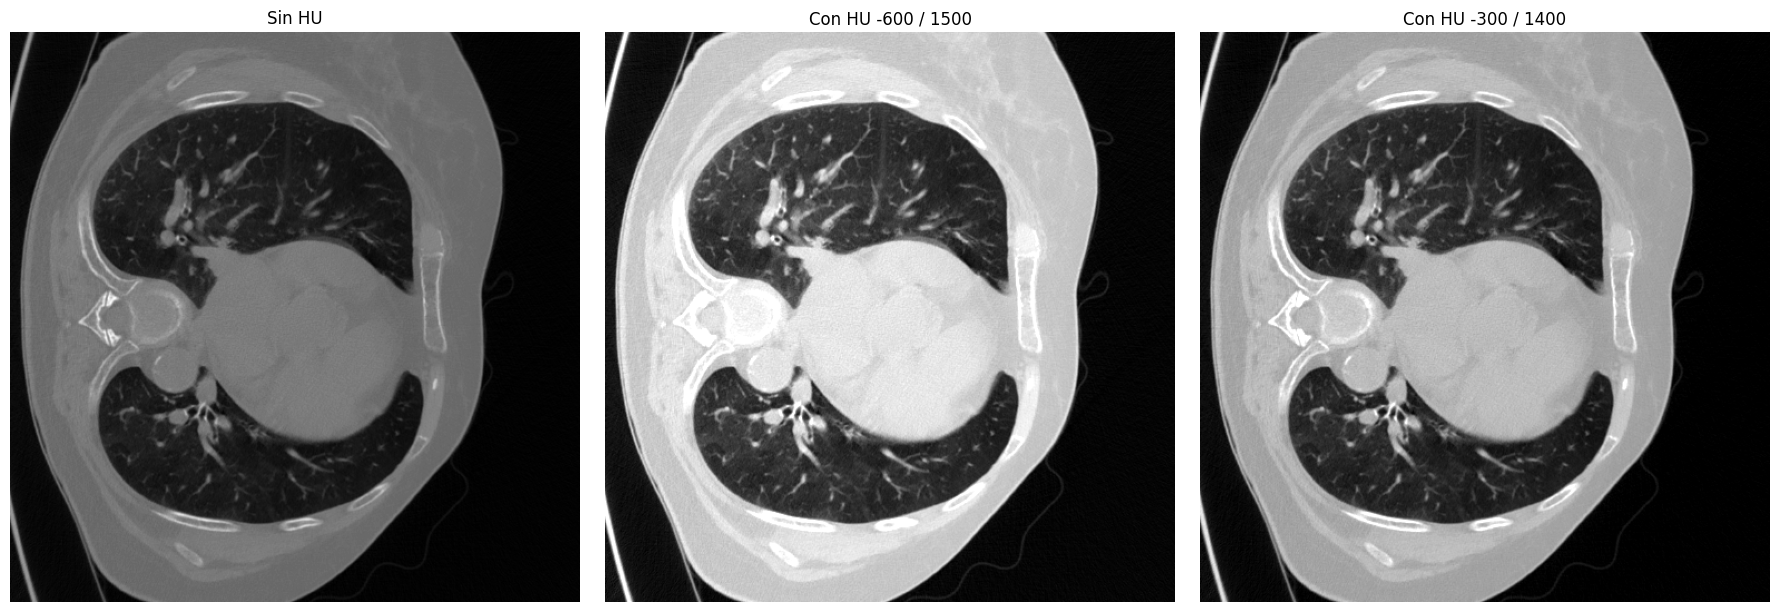

In [8]:
#  ID de paciente de ejemplo
patient_id = "1MASh"

# Rutas a las carpetas preprocesadas ya generadas (.npy guardados)
path_medium = f"/mnt/homeGPU/mcribilles/TFG/volumenes/preprocesados/preprocesamientos2/resize_medium/npy/images/{patient_id}.npy"
path_hu_m600_1500 = f"/mnt/homeGPU/mcribilles/TFG/volumenes/preprocesados/preprocesamientos2/resize_medium_hu_m600_1500_separadas/npy/images/{patient_id}.npy"
path_hu_m300_1400 = f"/mnt/homeGPU/mcribilles/TFG/volumenes/preprocesados/preprocesamientos2/resize_medium_hu_m300_1400_separadas/npy/images/{patient_id}.npy"

#  Cargar los .npy
vol_noHU = np.load(path_medium)
vol_hu_m600_1500 = np.load(path_hu_m600_1500)
vol_hu_m300_1400 = np.load(path_hu_m300_1400)

print(f"Shapes cargadas: noHU={vol_noHU.shape}, HU-600/1500={vol_hu_m600_1500.shape}, HU-300/1400={vol_hu_m300_1400.shape}")

# Extraemos el slice central
def get_central_slice(volume):
    z = volume.shape[0] // 2
    return volume[z, :, :]

slice_noHU = get_central_slice(vol_noHU)
slice_hu_m600_1500 = get_central_slice(vol_hu_m600_1500)
slice_hu_m300_1400 = get_central_slice(vol_hu_m300_1400)

# Normalización para mostrar bien en gris
def normalize(img):
    img = img.astype(np.float32)
    img -= img.min()
    img /= (img.max() + 1e-8)
    return img

# visualizamos
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(normalize(slice_noHU), cmap="gray")
plt.title("Sin HU")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(normalize(slice_hu_m600_1500), cmap="gray")
plt.title("Con HU -600 / 1500")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(normalize(slice_hu_m300_1400), cmap="gray")
plt.title("Con HU -300 / 1400")
plt.axis("off")

plt.tight_layout()
plt.show()
